# The Linear Equation

$$y=mx$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [3]:
# สร้าง Algorithm y
def y(x, m):
  return m * x

In [4]:
# กำหนด ความชัน หรือเงื่อนไข m
m = 2
# กำหนด ข้อมูล Input x
x = np.arange(-10, 10)

print("ความชัน m = ", m)
print("ข้อมูล input x:", x)

ความชัน m =  2
ข้อมูล input x: [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]


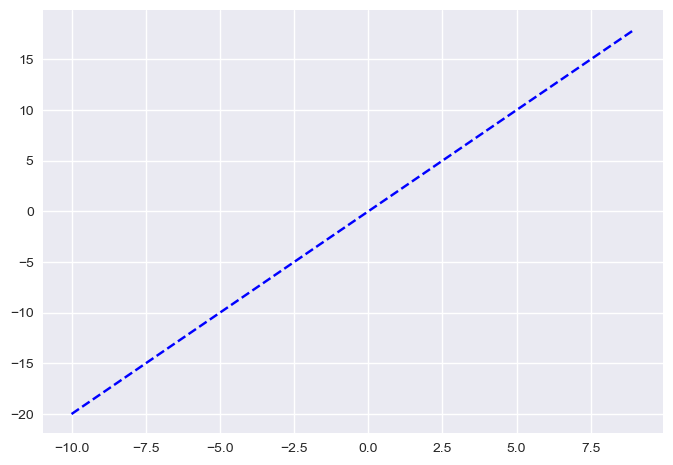

In [5]:
plt.plot(x, y(x, m), color='blue', linestyle='dashed')

## แบบฝึก 1
จงสร้าง algorithm สำรหรับ ฟังก์ชั่นเส้นตรง
$$y = mx + b$$

$b$ ถูกเรียกว่า Intercept ของสมการ $y$

# The General Format of Linear Equation

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 +\cdots + \beta_nx_n$$

- $y$ คือ **dependent variable**
- $x_1, x_2, \ldots, x_n$ คือ **independent variables** ซึ่งเป็นตัวกำหนดผล $y$.
- $\beta_0$ คือ intercept, แสดงถึงค่า $y$ เมื่อ $x$ ทั้งหมดเป็น 0.
- $\beta_1, \beta_2,\ldots, \beta_n$ คือ coefficients ซึ่งกำหนดผลกระทบของแต่ละ  $x$ ที่มีต่อ $y$.

In [6]:
from sklearn.datasets import make_regression

In [7]:
# สร้างข้อมูลเพื่อใช้ทดสอบโมเดลเชิงเส้น
x, y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)

In [8]:
x.shape, y.shape

((100, 10), (100,))

# Machine Learning: Linear Regression

หน้าที่ของ ML คือ การหา $\beta_0, \beta_1, \beta_2,\ldots, \beta_n$ จากข้อมูล $x, y$


จากข้อมูลข้างบนเรามี
- จำนวนข้อมูลอยู่ที่ `100` ตัวอย่าง
- จำนวน Independent variables อยู่ `10`  
หรือเขียนออกมาเป็น เวคเตอร์ $y$ และ เมทริกซ์ $x$ ได้ดังนี้

$$\text{Feature Data} = x =\begin{bmatrix}x_{1,1}&x_{1,2}&\cdots&x_{1,10}\\\\
                                          x_{2,1}&x_{2,2}&\cdots&x_{2,10}\\\\
                                          \vdots&\vdots&\ddots&\vdots\\\\
                                          x_{100,1}&x_{100, 2}&\cdots&x_{100, 10}
                            \end{bmatrix}$$

$$\text{label} = y = \begin{bmatrix}y_1\\y_2\\\vdots\\y_{100}\end{bmatrix}$$

นั่นหมายความว่าเราสามารถเขียนสมการเชิงเส้นโดยใช้การคูณเมทริกซ์ได้เป็น

$$
\begin{bmatrix}
1&x_{1,1}&x_{1,2}&\cdots&x_{1,10}\\
1&x_{2,1}&x_{2,2}&\cdots&x_{2,10}\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
1&x_{100,1}&x_{100,2}&\cdots&x_{100,10}
\end{bmatrix}
\begin{bmatrix}
\beta_0\\
\beta_1\\
\beta_2\\
\vdots\\
\beta_{10}
\end{bmatrix}=
\begin{bmatrix}y_1\\y_2\\\vdots\\y_{100}\end{bmatrix}\to x\beta = y$$

In [9]:
# เพิ่ม intercepts ให้เมทริกซ์ x
x = np.hstack([np.ones((100, 1)), x])

In [ ]:
x

array([[ 1.        , -0.92693047, -1.43014138, ..., -0.05952536,
        -0.25256815, -0.44004449],
       [ 1.        ,  0.20292302,  0.33445679, ..., -1.51574411,
        -0.61278869,  0.65854427],
       [ 1.        , -0.24123606,  0.45675322, ...,  0.3520554 ,
        -0.08215118,  0.56976728],
       ...,
       [ 1.        ,  0.49671415,  0.76743473, ..., -0.1382643 ,
        -0.23415337, -0.46947439],
       [ 1.        , -0.04946371,  2.45530014, ...,  0.67481949,
         0.16645221, -0.63773998],
       [ 1.        ,  0.36139561, -0.29900735, ...,  1.53803657,
        -2.6197451 ,  0.09176078]])

In [ ]:
# ทดลองสุ่มสร้าง coefficients beta


In [ ]:
# ทดลองทำนาย y จาก coefficients beta ที่ได้จากการสุ่ม


## การทดสอบผลลัพธ์ของ Linear Regression

$$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$$

# การหา Optimal $\beta$

คูณทั้งสองข้างของสมการ $x\beta = y$ ด้วย $(x^\top x)^{-1}x^\top$

จะได้ว่า

$$
\begin{align}
x\beta &= y\\\\
(x^\top x)^{-1}x^\top x\beta &= (x^\top x)^{-1}x^\top y\\\\
(x^\top x)^{-1}(x^\top x)\beta &= (x^\top x)^{-1}x^\top y\\\\
I\beta &= (x^\top x)^{-1}x^\top y\\\\
\beta &= (x^\top x)^{-1}x^\top y
\end{align}
$$

In [ ]:
beta = 